In [1]:
1+1

2

# Scatter plot

/var/folders/dw/jw3_fk591cg2_j7b7t97jytr0000gn/T/ipykernel_16384/695412984.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Film NO.'] = df_clean['Film NO.'].astype(int)
/var/folders/dw/jw3_fk591cg2_j7b7t97jytr0000gn/T/ipykernel_16384/695412984.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Color'] = df_clean['Film NO.'].map(color_map)


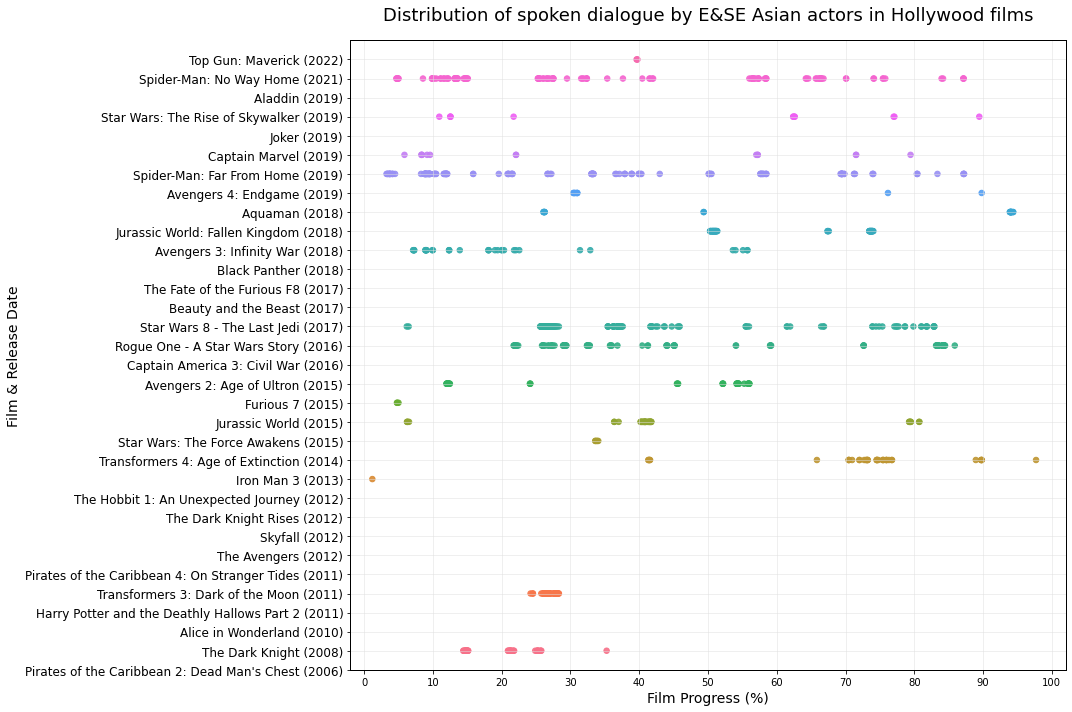

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data
df = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Scatter Plot/DATA_Distribution.xlsx", sheet_name="Sheet1")

# clean data
df_clean = df[df['Distribution'].notna() & df['Film NO.'].notna()]
df_clean['Film NO.'] = df_clean['Film NO.'].astype(int)


film_name_map = df[['Film NO.', 'Unnamed: 3']].dropna().drop_duplicates().set_index('Film NO.')['Unnamed: 3'].astype(str).to_dict()

# color
unique_films = df_clean['Film NO.'].unique()
palette = sns.color_palette("husl", len(unique_films))
color_map = dict(zip(unique_films, palette))
df_clean['Color'] = df_clean['Film NO.'].map(color_map)

# draw
plt.figure(figsize=(15, 10))
plt.scatter(
    df_clean['Distribution'] * 100,
    df_clean['Film NO.'],
    c=df_clean['Color'],
    s=30,
    alpha=0.9
)

# set the name of film in the Y
plt.yticks(
    ticks=sorted(film_name_map.keys()),
    labels=[film_name_map[i] for i in sorted(film_name_map.keys())]
)

plt.xticks(ticks=range(0, 101, 10))
plt.yticks(
    ticks=sorted(film_name_map.keys()),
    labels=[film_name_map[i] for i in sorted(film_name_map.keys())],
    fontsize=12
)
plt.title("Distribution of spoken dialogue by E&SE Asian actors in Hollywood films", fontsize=18, pad=20)
plt.xlabel("Film Progress (%)", fontsize=14)
plt.ylabel("Film & Release Date", fontsize=14)
plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5, color='#e0e0e0')
plt.gca().set_facecolor('white')

# Frame setting
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.0)

plt.xlim(-2, 102)
plt.ylim(df_clean['Film NO.'].min() - 1, df_clean['Film NO.'].max() + 1)

# Show the plot
plt.tight_layout()
plt.savefig(
    "Figure 5.png",
    dpi=300,
    bbox_inches='tight')
plt.show()